<h1 align="center"> Homework 6 Programming Task</h1>
<h3 align="center"> IST 5520: Data Science and Machine Learning with Python, 2022 Fall </h3>
<h3 align="center"> Student: Estelle Lu
</h3>

**Instruction:**

Complete the following tasks (1 point for each task or question, 12 points in total). You can add additional lines if necessary.

# Task: Summarize and Visualize Data (12 points)

## (1) Read in dataset

The data file “UniversalBank.csv” contains a dataset of 5000 customers of the Universal Bank.

Below is the description of columns in the dataset.

- Id: Customer ID
- Age: Customer’s age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer (1000 dollars)
- ZIPCode: Home Address ZIP code.
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month (1000 dollors)
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any. (1000 dollars)
- Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities_Account: Does the customer have a securities account with the bank?
- CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- CreditCard: Does the customer use a credit card issued by UniversalBank?

In [47]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

dat = pd.read_csv('/Users/estellelu/downloads/UniversalBank.csv')
dat.sample(10)

,Id,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2266,2267,38,13,143,94550,1,4.1,1,0,0,0,0,0,0
1172,1173,49,24,45,92104,3,1.7,2,0,0,1,0,1,0
2844,2845,60,34,64,95014,3,2.2,3,0,0,0,0,0,0
3068,3069,56,26,90,92120,2,4.5,3,0,0,0,0,0,0
310,311,57,32,39,90277,4,0.9,1,0,0,0,0,1,1
4901,4902,26,0,54,96094,3,1.1,2,0,0,0,0,1,0
487,488,39,13,88,94117,4,1.4,2,0,0,0,0,1,1
4826,4827,56,31,81,93943,2,0.0,3,225,0,0,0,0,0
2252,2253,58,32,41,95819,3,1.4,1,0,0,0,0,1,0
1123,1124,46,20,91,92521,4,2.6,3,0,0,0,0,0,0


## (2) Print the number of observations and the number of variables in the dataset.

Use the following format:

"Number of observations = xxx"

"Number of variables = xxx"

Do not hard code your logic.

In [48]:
print ("Number of observations = ", len(dat.index))

Number of observations =  5000


In [49]:
print ("Number of variables = ",dat.shape[1])

Number of variables =  14


## (3)  Create a contingency table (two-way frequency table) of 'Family' and 'Education', showing subtotals (margins)

In [50]:
pd.crosstab(dat.Family, dat.Education, margins=True, margins_name="Total")

Education,1,2,3,Total
Family,,,,
1,678,326,468,1472
2,657,265,374,1296
3,349,383,278,1010
4,412,429,381,1222
Total,2096,1403,1501,5000


**Question 1**: What is the value in the cell where Family=3 and Education=1? Type your answer below (0.5 point)

Your answer: 349

Interpret the meaning of this value below (0.5 point).

Your interpretation:Education Level 3 is grouped as "Advanced/Professional". The highest value in column 3 in education is with the smallest family size = 1. This suggests that that the smaller the family size the higher the education level.

## (4) Draw a scatter plot of 'Income' and 'CCAvg'.

Use Income as x variable, CCAvg as y variable.

Specify the labels of x-axis and y-axis by using easy-to-understand language.

<AxesSubplot:xlabel='Income', ylabel='CCAvg'>

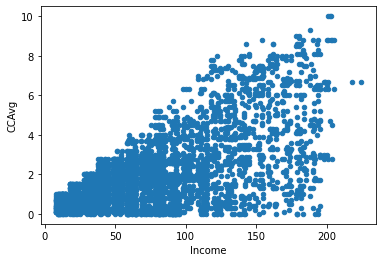

In [21]:
df = pd.read_csv("UniversalBank.csv")
df.plot(kind='scatter',x='Income',y='CCAvg')

**Question 2**: Based on the scatter plot, what is the relationship between anual income and average spending on credit cards? Type your answer below.

Your answer:
It is a positive relationship. The higher the annual income the higher the average spending on credit cards

## (5) Draw a boxplot of Income grouped by Personal_Loan.

Draw a boxplot of income for customers who accepted the personal loan and another boxplot for customers who did not accept the personal loan. Show all the two boxplots in a single graph.

<AxesSubplot:xlabel='Personal_Loan', ylabel='Income'>

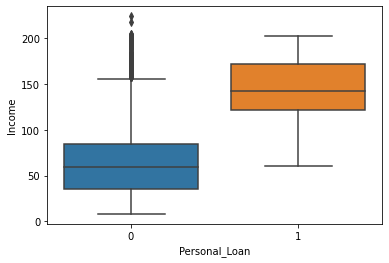

In [29]:
sns.boxplot(y=dat["Income"],x=dat["Personal_Loan"])

**Question 3**: Based on the box plot, which group of customers contains outliers of income? What is the relationship between a customer's income and whether the customer accepted the personal loan? Type all your answers below.

Your answer:
(1) The group of customers who did not accept the personal loan (Personal_Loan=0) offered contain outliers of income higher than 150. 
The outcome of the next 2 lines of code shows those ouliers with an Income>150 but with Personal_Loan=0.

(2) The relationship between a customer's income and whether or not the customer accepted the personal loan seems show that those with an income lower than 100 were not offered the personal loan (Personal_Loan=0).

In [54]:
dat2=dat[['Personal_Loan','Income']]
dat2[(dat2.Personal_Loan == 0) & (dat2.Income >150)]

,Personal_Loan,Income
24,0,152
27,0,158
59,0,188
97,0,161
148,0,163
...,...,...
4895,0,201
4911,0,153
4937,0,162
4981,0,195


## (6) Detect potential outliers in Income

Draw a boxplot of Income for all customers. Show all observations in the dataset that contain outliers in the Income variable. 

<AxesSubplot:xlabel='Personal_Loan', ylabel='Income'>

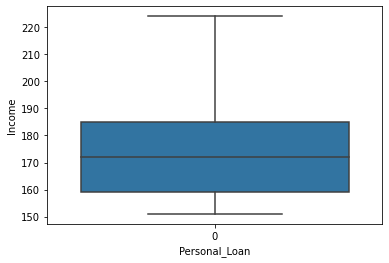

In [52]:
dat2=dat[['Personal_Loan','Income']]
dat3=dat2[(dat2.Personal_Loan == 0) & (dat2.Income >150)]
sns.boxplot(y=dat3["Income"],x=dat3["Personal_Loan"])

**Question 4**: How many outliers have you detected? Type your answer below.

Print your answer below. Use the format 'The number of outliers detected = xx'.

In [53]:
dat2=dat[['Personal_Loan','Income']]
dat3=dat2[(dat2.Personal_Loan == 0) & (dat2.Income >150)]
count_rows=dat3.shape[0]
print ('The number of outliers detected = ', count_rows)

The number of outliers detected =  224


## (7) Draw a bar chart of CCAvg for all family sizes.

Show a bar for each family size.

Show standard errors on the bars.

Text(0.5, 1.0, 'CCAvg for all family sizes')

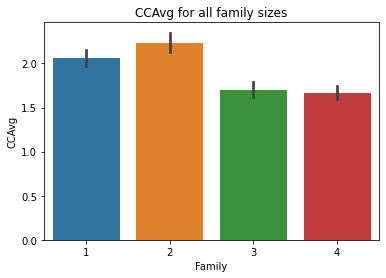

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dat = pd.read_csv('/Users/estellelu/downloads/UniversalBank.csv')
df = pd.read_csv("UniversalBank.csv")
sns.barplot(x = 'Family',y = 'CCAvg',data = df)
plt.title('CCAvg for all family sizes')

**Question 5**: Based on the above bar plot, which family has the highest average spending on credit cards per month? Which family size has the greatest variation in the average spending? Type your answers below.

Your answer:Family 2 has the highest average spending on credit cards per month

